In [9]:
from osgeo import gdal
import numpy as np


path = r"C:\Users\lenovo\Downloads\delta_03_11-0000021504-0000000000.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data

In [10]:
print(all_pixel_bands.shape)

(7168, 2227, 21)


In [11]:
scale_factors = [1, 0.0139465, 0.0133873, 0.0121481, 0.0115198, 0.0100953, 0.0123538, 0.00879161, 0.00876539, 0.0095103, 0.00773378, 0.00675523, 0.0071996, 0.00749684, 0.0086512, 0.00526779, 0.00530267, 0.00493004, 0.00549962, 0.00502847, 0.00326378, 0.00324118]

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * scale_factors[band_num]
    all_pixel_bands[:, :, band_num - 1] = band_data

# Reshape the array to have dimensions 27698604x9
reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

In [ ]:
# Create column names
column_names = [f"Oa{band_num+1}_radiance" for band_num in range(1, num_bands + 1)]

# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=column_names)

print("Shape of DataFrame:", dff.shape)

In [ ]:
#array
np_array=dff.to_numpy()
np.save(r"D:\ACADMIA\Project\Project_alpha\BOB_cropped_data\SEN3\sundarban_delta_03_11.npy",np_array)

print("Data exported")

In [1]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\delta_03_11.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [4]:
columns=['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance', 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance', 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance', 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
dff = pd.DataFrame(new_data, columns=columns)
print(dff.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15963136 entries, 0 to 15963135
Data columns (total 21 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Oa01_radiance  float64
 1   Oa02_radiance  float64
 2   Oa03_radiance  float64
 3   Oa04_radiance  float64
 4   Oa05_radiance  float64
 5   Oa06_radiance  float64
 6   Oa07_radiance  float64
 7   Oa08_radiance  float64
 8   Oa09_radiance  float64
 9   Oa10_radiance  float64
 10  Oa11_radiance  float64
 11  Oa12_radiance  float64
 12  Oa13_radiance  float64
 13  Oa14_radiance  float64
 14  Oa15_radiance  float64
 15  Oa16_radiance  float64
 16  Oa17_radiance  float64
 17  Oa18_radiance  float64
 18  Oa19_radiance  float64
 19  Oa20_radiance  float64
 20  Oa21_radiance  float64
dtypes: float64(21)
memory usage: 2.5 GB
None


In [5]:
dff[columns] = dff[columns].fillna(0)

In [6]:
X_new=dff[columns]
X_new

,Oa01_radiance,Oa02_radiance,Oa03_radiance,Oa04_radiance,Oa05_radiance,Oa06_radiance,Oa07_radiance,Oa08_radiance,Oa09_radiance,Oa10_radiance,...,Oa12_radiance,Oa13_radiance,Oa14_radiance,Oa15_radiance,Oa16_radiance,Oa17_radiance,Oa18_radiance,Oa19_radiance,Oa20_radiance,Oa21_radiance
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15963131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15963132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15963133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15963134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import pandas as pd
import numpy as np

df = pd.read_csv(r"D:\MTP\DLR\mediterrean_sea\data_files\mediterranean_sea_dataset.csv")

features = ['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance',
            'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance',
            'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance',
            'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
X = df[features]
target = 'CPHL'
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor()#n_estimators=100, max_depth=15)#, max_features='sqrt')
rf.fit(X_train_scaled, y_train.values.ravel())

y_test_pred = rf.predict(X_test_scaled)


rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'RMSE RF Regression: {rmse_rf}')

y_train_predicted = rf.predict(X_train_scaled)

# absolute errors
rf_errors = np.abs(y_train_predicted - y_train)
error_threshold = 0.1

rf_binary_labels = (rf_errors < error_threshold).astype(int)
print(f'total instances {len(y_train)}')
print(f'good instances {np.sum(rf_binary_labels)}')

# rf_classifier 
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_scaled, rf_binary_labels)


# Set a custom confidence threshold before making predictions
confidence_threshold = 0.8

# Make predictions and convert probabilities to binary predictions based on the threshold
probabilities = rfc.predict_proba(X_test_scaled)
custom_predictions = (probabilities[:, 1] > confidence_threshold).astype(int)

X_test_good=custom_predictions>0.5

# X_test_good=rfc.predict(X_test_scaled)>0.5

# rf_regressor.fit(X_train[y_train_good], y_train[y_train_good])
y_test_pred_after = rf.predict(X_test_scaled[X_test_good])


rmse_rf_rc = np.sqrt(mean_squared_error(y_test[X_test_good], y_test_pred_after))


print(f'RMSE RF Regression & Classifier: {rmse_rf_rc}')

RMSE RF Regression: 0.09548163900058655
total instances 7768
good instances 7450
RMSE RF Regression & Classifier: 0.08201574265593783


In [7]:
# Make predictions and convert probabilities to binary predictions based on the threshold
X_new_scaled = scaler.transform(X_new)
probabilities = rfc.predict_proba(X_new_scaled)
custom_predictions = (probabilities[:, 1] > confidence_threshold).astype(int)

X_test_good=custom_predictions>0.5

y_new_pred = rf.predict(X_new_scaled[X_test_good])

# rmse_rf_rc = np.sqrt(mean_squared_error(y_test[X_test_good], y_test_pred_after))

Image saved successfully to D:\MTP\DLR\final_paper\sdbd_map_rfc.pdf


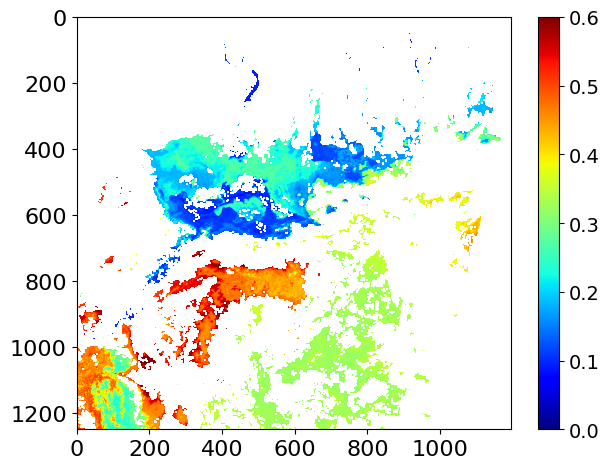

In [12]:
import matplotlib.pyplot as plt
import os
# Assuming height and width are the original dimensions of your TIFF file
original_height = 7168
original_width = 2227

# Reshape the predicted values for good pixels
data_good_pixels = np.full((original_height * original_width,), np.nan)

# Assign the predicted values for good pixels to the corresponding locations
data_good_pixels[X_test_good] = y_new_pred

# Reshape the array to the original dimensions
all_predictions = np.reshape(data_good_pixels, (original_height, original_width))

# Update corresponding locations in data with NaN
nan_locations = np.isnan(band_data)
all_predictions[nan_locations] = np.nan

# Visualize the final predicted map
plt.imshow(all_predictions[1250:2500,1030:], aspect="auto", cmap='jet', vmin=0, vmax=0.6)
colorbar=plt.colorbar()#label='Chlorophyll Range')djust the size as needed
colorbar.ax.tick_params(labelsize=14)  # Adjust the size as needed

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.title('Final Predicted Chlorophyll Map')

save_directory = r"D:\MTP\DLR\final_paper"
file_name = 'sdbd_map_rfc.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()

Image saved successfully to D:\MTP\DLR\final_paper\sdbd_map_rf.pdf


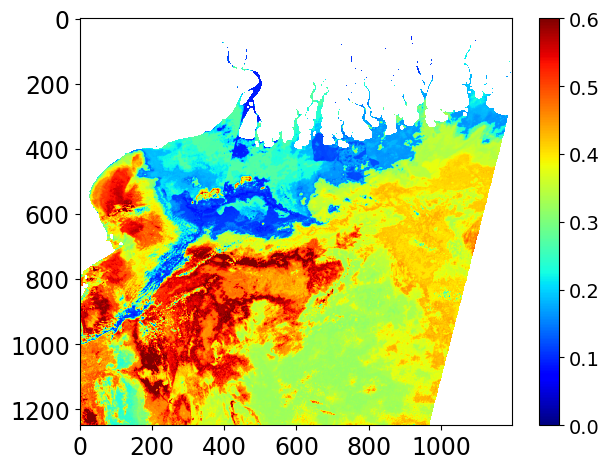

In [13]:
import matplotlib.pyplot as plt
import os

total_pred=rf.predict(X_new_scaled)
data=np.reshape(total_pred,(7168, 2227))

# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the final predicted map
plt.imshow(data[1250:2500,1030:], aspect="auto", cmap='jet', vmin=0, vmax=0.6)
colorbar=plt.colorbar()#label='Chlorophyll Range')djust the size as needed
colorbar.ax.tick_params(labelsize=14)  # Adjust the size as needed

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

save_directory = r"D:\MTP\DLR\final_paper"
file_name = 'sdbd_map_rf.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()